<a href="https://colab.research.google.com/github/Guru2308/Feynn-Labs/blob/main/ChickSex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTS

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Set the paths to your dataset folders

In [ ]:
train_data_dir = '/content/drive/MyDrive/chick/train'
validation_data_dir = '/content/drive/MyDrive/chick/valid'
test_data_dir = '/content/drive/MyDrive/chick/test'

Set hyperparameters

In [ ]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 1

# Data Preprocessing and Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1296 images belonging to 2 classes.
Found 370 images belonging to 2 classes.


# Build the CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

41/41 [==============================] - 398s 10s/step - loss: 0.0169 - accuracy: 0.9900 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# Evaluation of Model

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Set to 'binary' for binary classification
)

test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print("Test Accuracy:", test_accuracy)

Found 189 images belonging to 2 classes.
6/6 [==============================] - 16s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0


# Saving Model

In [ ]:
model.save('chicken_sex_detection_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('chicken_sex_detection_model.h5')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

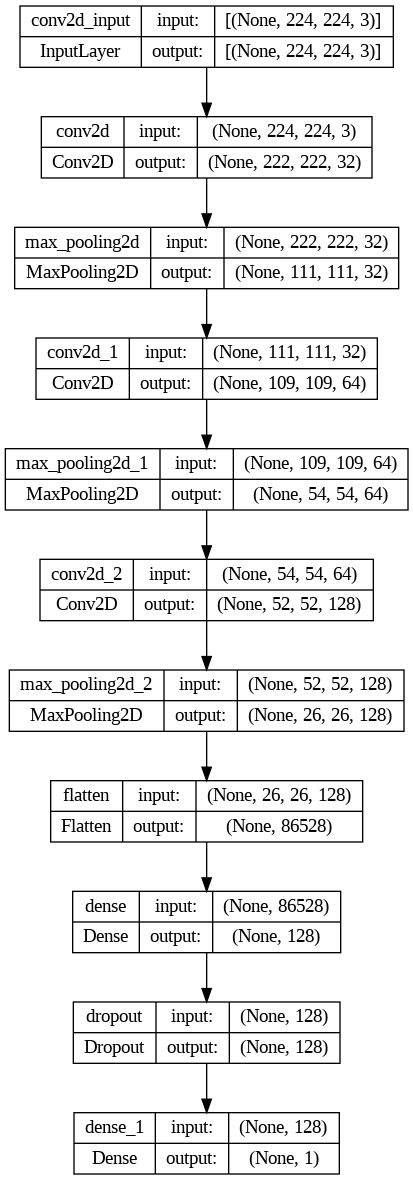

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)


1/1 [==============================] - 0s 83ms/step


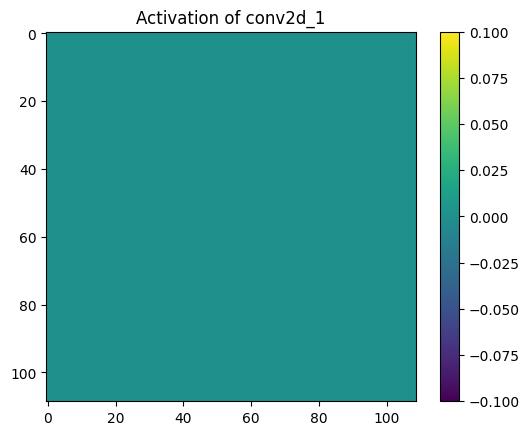

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

model = load_model('chicken_sex_detection_model.h5')

height, width, channels = 224, 224, 3

sample_input = np.random.random((1, height, width, channels))

layer_name = 'conv2d_1'  # Replace with the name of the layer you want to visualize
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(sample_input)

plt.imshow(intermediate_output[0, :, :, 0])  # Assuming a 2D activation map for simplicity
plt.title('Activation of ' + layer_name)
plt.colorbar()
plt.show()


Activation visualization

1/1 [==============================] - 0s 200ms/step


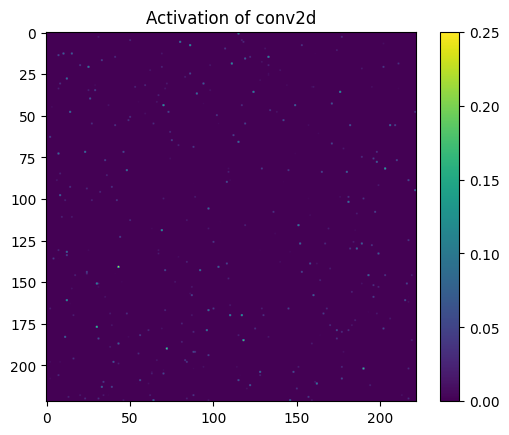

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model

height, width, channels = 224, 224, 3

sample_input = np.random.random((1, height, width, channels))

layer_name = 'conv2d'  # Change this to the first convolutional layer's name
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(sample_input)

plt.imshow(intermediate_output[0, :, :, 0])  # Assuming a 2D activation map for simplicity
plt.title('Activation of ' + layer_name)
plt.colorbar()
plt.show()

In [ ]:
#training history

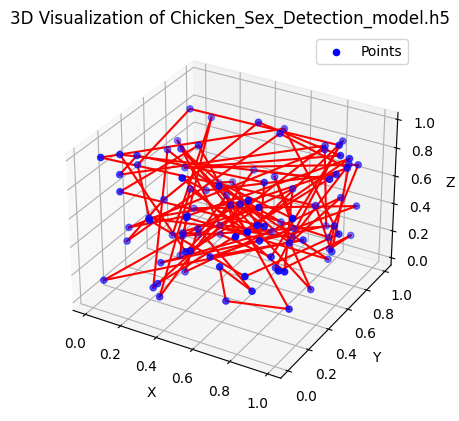

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

model = tf.keras.models.load_model('/content/chicken_sex_detection_model.h5')

points = np.random.rand(100, 3)
edges = np.array([[i, i+1] for i in range(len(points) - 1)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')

for edge in edges:
    ax.plot3D(points[edge, 0], points[edge, 1], points[edge, 2], c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of Chicken_Sex_Detection_model.h5')

plt.legend()
plt.show()
